In [63]:
from math import sqrt
import matplotlib.pyplot as plt

if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
%matplotlib.rcParams['axes.unicode_minus']=False

UsageError: Line magic function `%matplotlib.rcParams` not found.


In [10]:
critics={
    'BTS':{'생일':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'생일':2.5, '바울':2, '할로윈':1},
    '나훈아':{'바울':4, '생일':3.5, '할로윈':5}
}
critics

{'BTS': {'생일': 5, '바울': 4, '할로윈': 1.5},
 '손흥민': {'바울': 5, '할로윈': 2},
 '조용필': {'생일': 2.5, '바울': 2, '할로윈': 1},
 '나훈아': {'바울': 4, '생일': 3.5, '할로윈': 5}}

In [11]:
#collaborative filtering(cf) :: 여러 사람들로부터 얻은 정보에 따라 각각의 사용자들의 관심사를 자동으로 예측.
#데이터의 양이 적을 때 -> item 기반 필터링 // 데이터의 양이 많을 때 -> 사용자기반 필터링

#critics에서 '손흥민'이 영화 '생일'을 관람한 후 에 평점을 얼마나 줄건지를 예측해 보자
#(사용자 기반 cf을 사용해보자!)
critics.get("BTS") 
# key가 존재하면 critics['BTS']와 같은 결과가 나옴
# key가 존재하지 않는다면 critics['AOA']를 했을 때는 오류가 발생하지만, 
#critics.get('AOA')를 한다면 None이 Return 되고 오류는 발생하지 않는다.

critics.get("BTS").get('할로윈')

1.5

In [12]:
def sim(i,j):
    #점의 위치를 받아서 거리를 계산해서 리턴
    return sqrt(pow(i,2)+pow(j,2))

In [13]:
#두 사람간의 유사도를 구하기 위해서 거리를 구해야 한다.
#피타고라스 정리를 사용
#거리가 작을 수록 유사도가 높다(점의 위치가 가깝다는 의미)
#!) (x1,y1), (x2,y2)
#distance = sqrt((x1-x2)^2 + (y1-y2)^2)

x=pow((critics.get('BTS').get('할로윈') - critics.get('조용필').get('할로윈')),2)
y=pow((critics.get('BTS').get('바울') - critics.get('조용필').get('바울')),2)
d=sqrt(x+y)

print(d)

var1=critics.get('BTS').get('바울') - critics.get('손흥민').get('바울')
var2=critics.get('BTS').get('할로윈') - critics.get('손흥민').get('할로윈')

print(sim(var1,var2))

var1=critics.get('조용필').get('바울') - critics.get('손흥민').get('바울')
var2=critics.get('조용필').get('할로윈') - critics.get('손흥민').get('할로윈')

print(sim(var1,var2))

var1=critics.get('나훈아').get('바울') - critics.get('손흥민').get('바울')
var2=critics.get('나훈아').get('할로윈') - critics.get('손흥민').get('할로윈')

print(sim(var1,var2))

2.0615528128088303
1.118033988749895
3.1622776601683795
3.1622776601683795


In [14]:
# var1=critics['나훈아']['바울']- critics['손흥민']['바울']
# var2=critics['나훈아']['할로윈']- critics['손흥민']['할로윈']

# print(sim(var1,var2))

#손흥민과 다른 사람들과의 거리 구하기.
for i in critics:
    if i != '손흥민': #'본인인 손흥민은 제외시킴'
        var1=critics[i]['바울']- critics['손흥민']['바울']
        var2=critics[i]['할로윈']- critics['손흥민']['할로윈']
        #print("%s과 손흥민 간의 거리: "%i, sim(var1,var2))
        print("%s과 손흥민 간의 유사도(0:낮 ,1:높): "%i, 1/(1+sim(var1,var2))) #값이 클수록(1에 가까울 수록) 유사도가 높음을 표현.
                

BTS과 손흥민 간의 유사도(0:낮 ,1:높):  0.4721359549995794
조용필과 손흥민 간의 유사도(0:낮 ,1:높):  0.2402530733520421
나훈아과 손흥민 간의 유사도(0:낮 ,1:높):  0.2402530733520421


    코사인 유사도 -> 자연어처리에서 많이 사용됨.
    유클리안 거리 ->3차원 이상의 공간에서 거리를 구할때 사용

In [15]:
def sim_distance(data, name1, name2):
    sum=0
    #유클리디안 거리를 계산해서 리턴
    for i in data[name1] :#나훈아가 본 영화의 제목이 i에 들어감
        if i in data[name2]: #나훈아도 보고, 조용필도 본 영화의 제목이 i에 들어감
                            #같은 영화를 봤다면
            sum+=pow(data[name1][i]-data[name2][i],2)  
    
    return 1/(1+sqrt(sum))

sim_distance(critics,'나훈아','조용필')
sim_distance(critics, '손흥민','BTS') #손흥민이 안본 영화는 계산에서 제외가 된다.


#모든 조합을 만들어서 sim_distance를 돌리고 max()를 통해서
#사람들 사이에서 가장 유사도가 높은 두사람을 뽑을 수 있다.


0.4721359549995794

In [26]:
# 딕셔너리 전체에서 가장 유사도가 큰 사람을 검색
# 상위 n명까지 출력해주는 함수(default : 3)
def top_match(data, name, index=3, sf=sim_distance): #함수 이름을 변수에 저장해서 사용할 수 있다.
    my_list=[]
    for i in data:#i에는 이름이 저장됨
        if name != i :
            my_list.append((sf(data,name,i),i))
 
    my_list.sort() #오름차순 정렬
    my_list.reverse() #오름차순인 리스트를 reverse해서 내림차순으로 만들어줌.
    
    return my_list[:index]

top_match(critics,'손흥민')
#손흥민을 제외한 나머지 사람들과의 유사도를 출력(내림차순 정렬)#함수 call할때, sf에 대한 함수를 따로 지정해 주지 않으면 sim_distance를 호출해서 사용하면됨.

[(0.4721359549995794, 'BTS'),
 (0.2402530733520421, '조용필'),
 (0.2402530733520421, '나훈아')]

In [92]:
def myBar(x,y):
    s=range(len(x))
    plt.barh(y,x,height=0.3, color="darkred")
    #plt.yticks(s,y)
    #plt.xticks(s,x)
    plt.xlabel("sim")
    plt.ylabel('name')
    plt.show()
    return

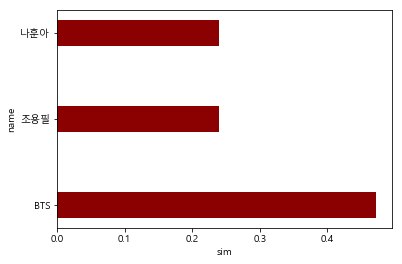

In [93]:
#top_match의 수행결과를 시각화
# x축에는 유사도, y축에는 이름, 수평 막대바도 출력

li=top_match(critics,'손흥민')

score=[]
names=[]

for s,n in li:
    score.append(s)
    names.append(n)
    
myBar(score,names)

In [105]:
critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블핑': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '인어공주': 3.5,
    },
    '싸이': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '장범준': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '있지': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '백지영': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이은미': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0}}

[0, 6, 0, 5]

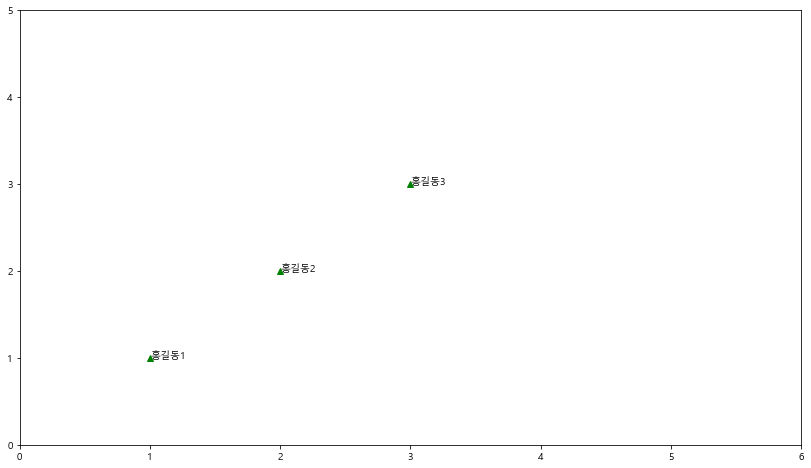

In [104]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^') #[x좌표의 위치]. [y좌표의 위치] ==> (1,1) (2,2) (3,3)
plt.text(1,1,'홍길동1')
plt.text(2,2,'홍길동2')
plt.text(3,3,'홍길동3')

plt.axis([0,6,0,5])

In [152]:
# 딕셔너리 전체에서 가장 유사도가 큰 사람을 검색
# 상위 n명까지 출력해주는 함수(default : 3)
def top_match(data, name, index=3, sf=sim_distance): #함수 이름을 변수에 저장해서 사용할 수 있다.
    my_list=[]
    for i in data:#i에는 이름이 저장됨
        if name != i :
            my_list.append((sf(data,name,i),i))
 
    my_list.sort() #오름차순 정렬
    my_list.reverse() #오름차순인 리스트를 reverse해서 내림차순으로 만들어줌.
    
    return my_list[:index]

#top_match(critics,'손흥민')
#손흥민을 제외한 나머지 사람들과의 유사도를 출력(내림차순 정렬)#함수 call할때, sf에 대한 함수를 따로 지정해 주지 않으면 sim_distance를 호출해서 사용하면됨.

In [115]:
#두 사람의 영화 평점 데이터를 시각화(스캐터 플롯)
def drawGraph(data,name1, name2):
    plt.figure(figsize=(14,8))
    li=[] #BTS 영화 평점을 저장하기 위한 리스트
    li2=[] #블핑 영화 평점을 저장하기 위한 리스트
    for i in data[name1]:
        if i in data[name2]:#BTS가 본 영화 i가 블핑도 본 영화이면,
            li.append(data[name1][i])
            li2.append(data[name2][i])
            plt.text(data[name1][i],data[name2][i],i)
    plt.plot(li,li2,'ro')
    plt.xlabel(name1)
    plt.ylabel(name2)
    
    return

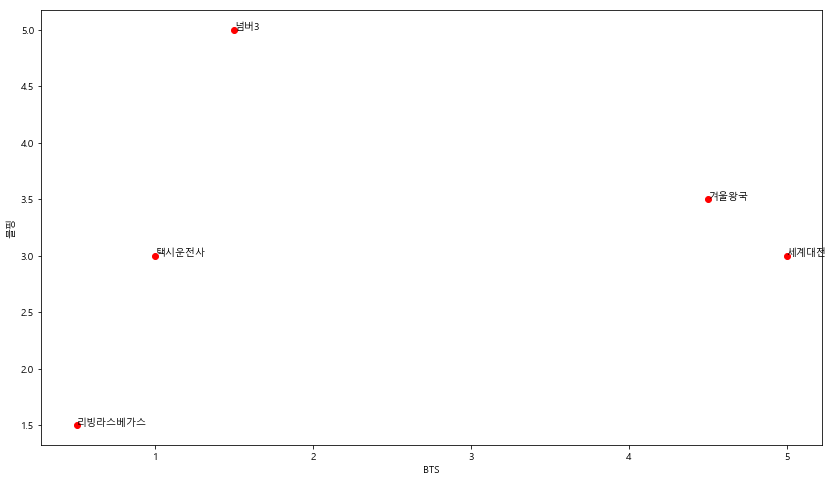

In [116]:
drawGraph(critics, "BTS",'블핑')

In [156]:
#상관계수
def sim_pearson(data, name1, name2):
    sumX=0; sumY=0  #sumX : BTS 평점의 합, sumY: 블핑 평점의 합(둘다 관람한 영화만 해당됨.)
    sumPowX=0; sumPowY=0 #sumXPow : BTS 평점 제곱의 합, sumPowY: 블핑 평점 제곱의 합
    sumXY=0; cnt=0 #sumXY: X*Y의 합, cnt: 공통된 영화의 개수
    
    for i in data[name1]:
        if i in data[name2]:
            sumX+=data[name1][i]; sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2); sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i] * data[name2][i]
            cnt+=1
            
    res=(sumXY- ((sumX*sumY)/cnt)) / sqrt((sumPowX-(pow(sumX,2)/cnt))* (sumPowY-(pow(sumY,2)/cnt)))
    #(sumXY-((sumX*sumY)/cnt)) / sqrt((sumPowX-pow(sumX,2)/cnt)*(sumPowY-pow(sumY,2)/cnt))
    return res

In [155]:
top_match(critics,'싸이',7,sf=sim_pearson)

[(1.0, '장범준'),
 (0.5692099788303083, 'BTS'),
 (0.40451991747794525, '조용필'),
 (0.20459830184114206, '블핑'),
 (0.13483997249264842, '있지'),
 (0.13483997249264842, '백지영'),
 (-1.0, '이은미')]

#예상평점 = 상관계수 * 상대방의 평점

ex. 상관계수 = 0.6 & 상대방의 x영화의 평점 = 4 ==> x영화에 대한 예상평점 : 2.4

In [ ]:
#추천영화 뽑고, 예상 평점 계산하기.